# Figure preparation 

In [1]:
# set the envoiroment
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.flux_analysis import flux_variability_analysis
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import escher
from escher import Builder
from utils import show_map
from utils.check_precursor_problem import check_precursor_problem

## Figure S5

In [32]:
x = np.linspace(0,1,401)
figure_S5 = pd.DataFrame({"X":x})
figure_S5["-Jp/L∆Gc"] = 0
figure_S5["Jc/L∆Gc"] = 0
figure_S5["-Jp/Jc"] = 0
figure_S5["Jp1/Jp"] = 0
figure_S5["Jp2/Jp"] = 0
figure_S5["n"] = 0
figure_S5["η"] = 0
φ = 0.2
n1 = 1
n2 = 2
L2= 1
L1=1
for i in range(len(figure_S5)):
    # The formula -Jp/(L∆Gc)= (111-φ)∙n1∙(1-n1∙X)+φ∙n2-φ∙(n2 )^2∙X was used for calculation of -Jp/(L∆Gc).
    figure_S5["-Jp/L∆Gc"].iloc[i] = (1-φ)*n1*(1-n1*figure_S5["X"].iloc[i]) + φ*n2*(1-n2*figure_S5["X"].iloc[i])
    # The formula Jc/(L∆Gc)= (1-φ)∙(1-n1∙X)+φ∙(1-n2∙X) was used for calculations of Jc/(L∆Gc).
    figure_S5["Jc/L∆Gc"].iloc[i] = (1-φ)*(1-n1*figure_S5["X"].iloc[i]) + φ*(1-n2*figure_S5["X"].iloc[i])
    # The formula -Jp/Jc = (-Jp/L∆Gc)/(Jc/L∆Gc) was used for calculation of -Jp/Jc.
    figure_S5["-Jp/Jc"].iloc[i] = (figure_S5["-Jp/L∆Gc"].iloc[i])/(figure_S5["Jc/L∆Gc"].iloc[i])
    # The formula -Jp1/Jp =(1-φ)∙n1∙(1-n1∙X)/(-Jp/L∆Gc) was used for calculation of -Jp1/Jp.
    figure_S5["Jp1/Jp"].iloc[i] = (1-φ)*n1*(1-n1*figure_S5["X"].iloc[i])/figure_S5["-Jp/L∆Gc"].iloc[i]
   # The formula -Jp2/Jp =φ∙n2∙(1-n2∙X)/(-Jp/L∆Gc) was used for calculation of -Jp2/Jp
    figure_S5["Jp2/Jp"].iloc[i] = φ*n2*(1-n2*figure_S5["X"].iloc[i])/figure_S5["-Jp/L∆Gc"].iloc[i]
    # The formula n = ((1-φ)∙n1∙(1-n1∙X)+φ∙n2∙(1-n_2∙X))/((1-φ)∙(1-n1∙X)+φ∙(1-n2∙X)) was used for calculation of n.
    figure_S5["n"].iloc[i] = ((1-φ)*n1*(1-n1*figure_S5["X"].iloc[i])+φ*n2*(1-n2*figure_S5["X"].iloc[i]))/((1-φ)*(1-n1*figure_S5["X"].iloc[i])+φ*(1-n2*figure_S5["X"].iloc[i]))
    # The formula η = -Jp/Jc∙X was used to caluculate of η.
    figure_S5["η"].iloc[i] = figure_S5["-Jp/Jc"].iloc[i]*figure_S5["X"].iloc[i]

C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\pandas\core\indexing.py:205 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:23 RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:25 RuntimeWarning: divide by zero encountered in double_scalars


In [34]:
figure_S5

,X,-Jp/L∆Gc,Jc/L∆Gc,-Jp/Jc,Jp1/Jp,Jp2/Jp,n,η
0,0.0000,1.200,1.000,1.200000,0.666667,0.333333,1.200000,0.000000
1,0.0025,1.196,0.997,1.199599,0.667224,0.332776,1.199599,0.002999
2,0.0050,1.192,0.994,1.199195,0.667785,0.332215,1.199195,0.005996
3,0.0075,1.188,0.991,1.198789,0.668350,0.331650,1.198789,0.008991
4,0.0100,1.184,0.988,1.198381,0.668919,0.331081,1.198381,0.011984
5,0.0125,1.180,0.985,1.197970,0.669492,0.330508,1.197970,0.014975
6,0.0150,1.176,0.982,1.197556,0.670068,0.329932,1.197556,0.017963
7,0.0175,1.172,0.979,1.197140,0.670648,0.329352,1.197140,0.020950
8,0.0200,1.168,0.976,1.196721,0.671233,0.328767,1.196721,0.023934
9,0.0225,1.164,0.973,1.196300,0.671821,0.328179,1.196300,0.026917


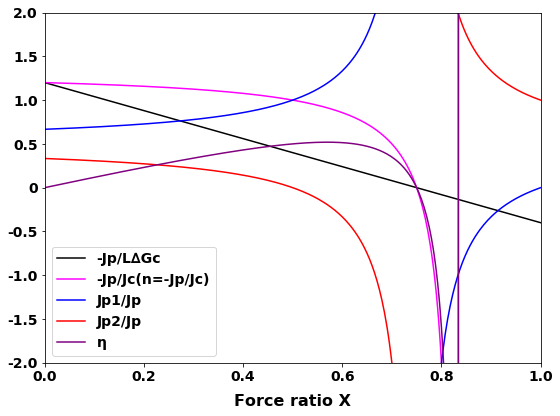

In [33]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), sharey=True)
fig.subplots_adjust(bottom=0.6, right=0.8)

formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
ax.yaxis.set_major_formatter(formatter)
ax.plot(figure_S5["X"],figure_S5["-Jp/L∆Gc"],color='black',label = "-Jp/L∆Gc")
ax.plot(figure_S5["X"],figure_S5["-Jp/Jc"],color='magenta',label = "-Jp/Jc(n=-Jp/Jc)")
ax.plot(figure_S5["X"],figure_S5["Jp1/Jp"],color='blue',label = "Jp1/Jp")
ax.plot(figure_S5["X"],figure_S5["Jp2/Jp"],color='red',label = "Jp2/Jp")
# ax.plot(figure_S5["X"],figure_S5["n"],color='green',label = "n")
ax.plot(figure_S5["X"],figure_S5["η"],color='purple',label = "η")

plt.legend(prop={"size":14}, loc='lower left', borderaxespad=0.5)

ax.set_yticklabels(["-2.0","-1.5","-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 14,fontweight = "bold")
plt.xticks(fontsize = 14,fontweight = "bold")
ax.set_ylim(-2.0, 2)
ax.set_xlim (0,1.0)
ax.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
plt.tight_layout()
plt.savefig('../figures/Figure S5', dpi=600)
plt.show()

## Figure S6

In [ ]:
x = np.linspace(0,1,401)
figure_S6 = pd.DataFrame({"X":x})
figure_S6["-Jp/LΔGc Z = 0.5"] = 0
figure_S6["-Jp/LΔGc Z = 1"] = 0
figure_S6["-Jp/LΔGc Z = 2"] = 0
figure_S6["-Jp/LΔGc Z = 4"] = 0
figure_S6["-Jp/LΔGc total"] = 0
figure_S6["Optimal Z = q2/4X"] = 0
# figure_S6["Z(maximal ATP syntheis flux) = q/2X"] = 0
q = 0.9
Z1 = 0.5
Z2 = 1
Z3 = 2
Z4 = 4
for i in range(len(figure_S6)):
    # The formula -Jp/L∆Gc= L∙∆Gc∙q∙z∙(1-z/q∙X)/(L∙∆Gc) = q∙z∙(1-z/q∙X) = z∙(q-z∙X) was used to calculate -Jp/LΔGc
    figure_S6["-Jp/LΔGc Z = 0.5"].iloc[i] = Z1*(q-Z1*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc Z = 1"].iloc[i] = Z2*(q-Z2*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc Z = 2"].iloc[i] = Z3*(q-Z3*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc Z = 4"].iloc[i] = Z4*(q-Z4*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc total"].iloc[i] = figure_S6["-Jp/LΔGc Z = 0.5"].iloc[i]+figure_S6["-Jp/LΔGc Z = 1"].iloc[i]+figure_S6["-Jp/LΔGc Z = 2"].iloc[i]+figure_S6["-Jp/LΔGc Z = 4"].iloc[i]
    figure_S6["Optimal Z = q2/4X"].iloc[i] = q*q/4/figure_S6["X"].iloc[i]

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 7), sharey=True)
fig.subplots_adjust(bottom=0.6, right=0.8)

formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
ax.yaxis.set_major_formatter(formatter)
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc Z = 0.5"],color='black',label = "-Jp/LΔGc Z = 0.5")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc Z = 1"],color='magenta',label = "-Jp/LΔGc Z = 1")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc Z = 2"],color='blue',label = "-Jp/LΔGc Z = 2")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc Z = 4"],color='red',label = "-Jp/LΔGc Z = 4")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc total"],color='green',label = "-Jp/LΔGc total")
ax.plot(figure_S6["X"],figure_S6["Optimal Z = q2/4X"],color='purple',linestyle='dashed', label = "Optimal Z = q\u00b2/4X")

plt.legend(prop={"size":14}, loc='upper right', borderaxespad=0.5)

ax.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 14,fontweight = "bold")
plt.xticks(fontsize = 14,fontweight = "bold")
ax.set_ylim(-1.0, 2)
ax.set_xlim (0,1.0)
ax.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
ax.set_ylabel("Normalized ATP synthesis flux", fontsize = 16, fontweight = "bold",labelpad=10)
plt.tight_layout()
plt.savefig('../figures/Figure S6.png', dpi=600)
plt.show()

In [ ]:
x = np.linspace(0,1,401)
figure_S6 = pd.DataFrame({"X":x})
figure_S6["-Jp/LΔGc Z = 0.5"] = 0
figure_S6["-Jp/LΔGc Z = 1"] = 0
figure_S6["-Jp/LΔGc Z = 2"] = 0
figure_S6["-Jp/LΔGc Z = 4"] = 0
figure_S6["-Jp/LΔGc total"] = 0
figure_S6["-Jp/LΔGc Optimal Z = q2/4X"] = 0
figure_S6["-Jp/LΔGc Z(maximal ATP syntheis flux) = q/2X"] = 0
q = 0.9
Z1 = 0.5
Z2 = 1
Z3 = 2
Z4 = 4

for i in range(len(figure_S6)):
    # The formula -Jp/L∆Gc= L∙∆Gc∙q∙z∙(1-z/q∙X)/(L∙∆Gc) = q∙z∙(1-z/q∙X) = z∙(q-z∙X) was used to calculate -Jp/LΔGc
    figure_S6["-Jp/LΔGc Z = 0.5"].iloc[i] = Z1*(q-Z1*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc Z = 1"].iloc[i] = Z2*(q-Z2*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc Z = 2"].iloc[i] = Z3*(q-Z3*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc Z = 4"].iloc[i] = Z4*(q-Z4*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc total"].iloc[i] = figure_S6["-Jp/LΔGc Z = 0.5"].iloc[i]+figure_S6["-Jp/LΔGc Z = 1"].iloc[i]+figure_S6["-Jp/LΔGc Z = 2"].iloc[i]+figure_S6["-Jp/LΔGc Z = 4"].iloc[i]
    figure_S6["-Jp/LΔGc Optimal Z = q2/4X"].iloc[i] = q*q/4/figure_S6["X"].iloc[i]*(q-(q*q/4/figure_S6["X"].iloc[i])*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc Z(maximal ATP syntheis flux) = q/2X"] = q/2/figure_S6["X"].iloc[i]*(q-(q/2/figure_S6["X"].iloc[i])*figure_S6["X"].iloc[i])

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 7), sharey=True)
fig.subplots_adjust(bottom=0.6, right=0.8)

formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
ax.yaxis.set_major_formatter(formatter)
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc Z = 0.5"],color='black',label = "-Jp/LΔGc Z = 0.5")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc Z = 1"],color='magenta',label = "-Jp/LΔGc Z = 1")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc Z = 2"],color='blue',label = "-Jp/LΔGc Z = 2")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc Z = 4"],color='red',label = "-Jp/LΔGc Z = 4")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc total"],color='green',label = "-Jp/LΔGc total")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc Optimal Z = q2/4X"],color='purple',linestyle='dashed', label = "-Jp/LΔGc Optimal Z = q\u00b2/4X")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc Z(maximal ATP syntheis flux) = q/2X"],color='yellow',linestyle='dashed', label = "-Jp/LΔGc Z = q/2X")
plt.legend(prop={"size":14}, loc='upper right', borderaxespad=0.5)

ax.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 14,fontweight = "bold")
plt.xticks(fontsize = 14,fontweight = "bold")
ax.set_ylim(-1.0, 2)
ax.set_xlim (0,1.0)
ax.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
ax.set_ylabel("Normalized ATP synthesis flux", fontsize = 16, fontweight = "bold",labelpad=10)
plt.tight_layout()
plt.savefig('../figures/Figure S61.png', dpi=600)
plt.show()

## figure S7

In [ ]:
x = np.linspace(0,1,401)
figure_S7 = pd.DataFrame({"X":x})
figure_S7["-Jp/LΔGc φ = 1"] = 0
figure_S7["-Jp/LΔGc φ = 0.375"] = 0
figure_S7["-Jp/LΔGc φ = 0.25"] = 0
figure_S7["-Jp/LΔGc φ = 0"] = 0
φ1 = 1
φ2 =0.375
φ3=0.25
φ4=0
n1 = 1
n2 = 3

for i in range(len(figure_S7)):
    # The formula -Jp/(L∆Gc)= (1-φ)∙n1∙(1-n1∙X)+φ∙n2-φ∙(n2 )^2∙X was used for calculation of -Jp/(L∆Gc).
    figure_S7["-Jp/LΔGc φ = 1"].iloc[i] = (1-φ1)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ1*n2*(1-n2*figure_S7["X"].iloc[i])
    figure_S7["-Jp/LΔGc φ = 0.375"].iloc[i] = (1-φ2)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ2*n2*(1-n2*figure_S7["X"].iloc[i])
    figure_S7["-Jp/LΔGc φ = 0.25"].iloc[i] = (1-φ3)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ3*n2*(1-n2*figure_S7["X"].iloc[i])
    figure_S7["-Jp/LΔGc φ = 0"].iloc[i] = (1-φ4)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ4*n2*(1-n2*figure_S7["X"].iloc[i])

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), sharey=True)
fig.subplots_adjust(bottom=0.6, right=0.8)
formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
ax.yaxis.set_major_formatter(formatter)
ax.plot(figure_S7["X"],figure_S7["-Jp/LΔGc φ = 1"],color='black',label = "-Jp/LΔGc φ = 1")
ax.plot(figure_S7["X"],figure_S7["-Jp/LΔGc φ = 0.375"],color='red',label = "-Jp/LΔGc φ = 0.375")
ax.plot(figure_S7["X"],figure_S7["-Jp/LΔGc φ = 0.25"],color='blue',label = "-Jp/LΔGc φ = 0.25")
ax.plot(figure_S7["X"],figure_S7["-Jp/LΔGc φ = 0"],color='magenta',label = "-Jp/LΔGc φ = 0")

plt.legend(prop={"size":14}, loc='upper right', borderaxespad=0.5)

ax.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 14,fontweight = "bold")
plt.xticks(fontsize = 14,fontweight = "bold")
ax.set_ylim(-1.0, 2)
ax.set_xlim (0,1.0)
ax.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
# ax.set_ylabel("Normalized ATP synthesis flux", fontsize = 16, fontweight = "bold",labelpad=10)
plt.tight_layout()
plt.savefig('../figures/Figure S7.png', dpi=600)
plt.show()

## figure S8

In [ ]:
x = np.linspace(0,1,401)
figure_S8 = pd.DataFrame({"X":x})
figure_S8["-Jp n = 1"] = 0
figure_S8["-Jp n = 2"] = 0
figure_S8["-Jp n = 3"] = 0
figure_S8["-Jp n = 4"] = 0
figure_S8["-Jp total"] = 0
figure_S8["-Jp optimal gear shifting"] = 0
figure_S8["gear"] = 0
n1 = 1
n2 = 2
n3 = 3
n4 = 4

for i in range(len(figure_S8)):
    # The formula -Jp=(1-φ)∙n∙L∙∆Gc∙(1-n∙X) was used to calculate -Jp,here φ = 0, L= 1, ∆Gc = 1.
    figure_S8["-Jp n = 1"].iloc[i] = n1*(1-n1*figure_S8["X"].iloc[i])
    figure_S8["-Jp n = 2"].iloc[i] = n2*(1-n2*figure_S8["X"].iloc[i])
    figure_S8["-Jp n = 3"].iloc[i] = n3*(1-n3*figure_S8["X"].iloc[i])
    figure_S8["-Jp n = 4"].iloc[i] = n4*(1-n4*figure_S8["X"].iloc[i])
    figure_S8["-Jp total"].iloc[i] = figure_S8["-Jp n = 1"].iloc[i]+figure_S8["-Jp n = 2"].iloc[i]+figure_S8["-Jp n = 3"].iloc[i]+figure_S8["-Jp n = 4"].iloc[i]
    figure_S8["-Jp optimal gear shifting"].iloc[i] = max(figure_S8["-Jp n = 1"].iloc[i],figure_S8["-Jp n = 2"].iloc[i],figure_S8["-Jp n = 3"].iloc[i],figure_S8["-Jp n = 4"].iloc[i])
for i in range(len(figure_S8)):
    if i <65:
        figure_S8["gear"].iloc[i] = 4
    elif 65<=i<89:
        figure_S8["gear"].iloc[i] = 3
    elif 89<=i<136:
        figure_S8["gear"].iloc[i] = 2
    else:
        figure_S8["gear"].iloc[i] = 1

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), sharey=True)
fig.subplots_adjust(bottom=0.6, right=0.8)

formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
ax.yaxis.set_major_formatter(formatter)
ax.plot(figure_S8["X"],figure_S8["-Jp n = 1"],color='black',label = "-Jp n = 1")
ax.plot(figure_S8["X"],figure_S8["-Jp n = 2"],color='red',label = "-Jp n = 2")
ax.plot(figure_S8["X"],figure_S8["-Jp n = 3"],color='blue',label  = "-Jp n = 3")
ax.plot(figure_S8["X"],figure_S8["-Jp n = 4"],color='brown',label = "-Jp n = 4")
ax.plot(figure_S8["X"],figure_S8["-Jp total"],color='green',label = "-Jp total")
ax.plot(figure_S8["X"],figure_S8["-Jp optimal gear shifting"],color='orange', label = "-Jp optimal gear shifting")
ax.plot(figure_S8["X"],figure_S8["gear"],color='purple',label = "gear")

plt.legend(prop={"size":14}, loc='upper right', borderaxespad=0.5)

ax.set_yticklabels(["-2.0","-1.0","0","1.0","2.0","3","4","5"],fontsize = 14,fontweight = "bold")
plt.xticks(fontsize = 14,fontweight = "bold")
ax.set_ylim(-2.0,5.0)
ax.set_xlim (0,1.0)
ax.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
ax.set_ylabel("ATP synthesis flux", fontsize = 16, fontweight = "bold",labelpad=10)
plt.tight_layout()
plt.savefig('../figures/Figure S8.png', dpi=600)
plt.show()

In [ ]:
stop

## Figure 2bc

In [ ]:
import matplotlib 
matplotlib.rcParams.update({'font.size':14,'font.weight':"bold"})
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
import pandas as pd

rawdata = pd.ExcelFile('../data/figure 2.xlsx')

figure_2b = pd.read_excel(rawdata, sheet_name = 'figure 2b')
figure_2b = figure_2b.drop_duplicates(subset= ['Values[GAPDH/(GAPDH +PGK)]','Values[GAPN/(GAPDH +PGK)]'])
figure_2c = pd.read_excel(rawdata, sheet_name = 'figure 2c')
figure_2c = figure_2c.drop_duplicates(subset= ['Values[GAPDH/(GAPDH +PGK)]','Values[GAPN/(GAPDH +PGK)]'])
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (8,12))
# fig, ax = plt.subplots()
ax1.scatter(figure_2b["Values[ATP/ADP ratio]"],figure_2b["Values[GAPDH/(GAPDH +PGK)]"],marker='*', label = "Fraction of GAPDH flux from GAP to 3PG")
ax1.scatter(figure_2b["Values[ATP/ADP ratio]"],figure_2b["Values[GAPN/(GAPDH +PGK)]"],marker= "+",label = "Fraction of GAPN flux from GAP to 3PG")

ax1.set_ylabel("Fraction of different pathways", fontsize = 16,labelpad = 10,fontweight = "bold")
ax1.set_xlabel("ATP/ADP", fontsize = 16,labelpad = 10,fontweight = "bold")
ax1.legend(prop={"size":14}, loc='upper left', borderaxespad=0.5)
ax1.set_ylim(-1,2)
ax2.scatter(figure_2c["Values[ATP/ADP ratio]"],figure_2c["Values[GAPDH/(GAPDH +PGK)]"],marker='*', label = "Fraction of GAPDH flux from GAP to 3PG")
ax2.scatter(figure_2c["Values[ATP/ADP ratio]"],figure_2c["Values[GAPN/(GAPDH +PGK)]"],marker= "+",label = "Fraction of GAPN flux from GAP to 3PG")
ax2.set_ylabel("Fraction of different pathways", fontsize = 16,labelpad = 10,fontweight = "bold")
ax2.set_xlabel("ATP/ADP", fontsize = 16,labelpad = 10,fontweight = "bold")
ax2.legend(prop={"size":14}, loc='upper left', borderaxespad=0.5)
ax2.set_ylim(-1.5,2.5)
plt.tight_layout()
plt.savefig('../figures/figure2bc.png', dpi=600)
plt.show()

In [ ]:
import matplotlib 
matplotlib.rcParams.update({'font.size':14,'font.weight':"bold"})
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
import pandas as pd

rawdata = pd.ExcelFile('../data/figure 2.xlsx')

figure_2b = pd.read_excel(rawdata, sheet_name = 'figure 2b')
figure_2c = pd.read_excel(rawdata, sheet_name = 'figure 2c')
figure_2b
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (6,9))
# fig, ax = plt.subplots()
line1, = ax1.plot(figure_2b["Values[ATP/ADP ratio]"],figure_2b["Values[GAPDH/(GAPDH +PGK)]"],marker='*', label = "Fraction of GAPDH flux from GAP to 3PG")
line2, = ax1.plot(figure_2b["Values[ATP/ADP ratio]"],figure_2b["Values[GAPN/(GAPDH +PGK)]"],marker= "x",label = "Fraction of GAPN flux from GAP to 3PG")

ax1.set_ylabel("Fraction of different pathways",labelpad = 5,fontweight = "bold")
ax1.set_xlabel("ATP/ADP",labelpad = 5,fontweight = "bold")

line1, = ax2.plot(figure_2c["Values[ATP/ADP ratio]"],figure_2c["Values[GAPDH/(GAPDH +PGK)]"],marker='*', label = "Fraction of GAPDH flux from GAP to 3PG")
line2, = ax2.plot(figure_2c["Values[ATP/ADP ratio]"],figure_2c["Values[GAPN/(GAPDH +PGK)]"],marker= "x",label = "Fraction of GAPN flux from GAP to 3PG")
ax2.set_ylabel("Fraction of different pathways",labelpad = 5,fontweight = "bold")
ax2.set_xlabel("ATP/ADP",labelpad = 5,fontweight = "bold")



# ax[0,0].legend()
# ax[1,0].legend()
plt.tight_layout()
# plt.savefig('figure2.png', dpi=1200)
plt.show()